In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.compat.v1 as tf
# import tensorflow as tf
from sklearn.model_selection import train_test_split
tf.disable_eager_execution()
tf.disable_v2_behavior()

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Ficheros/HorasEstudio.csv',header=None, names=['horas_de_estudio','horas_de_sueño','clasificacion'])
data

,horas_de_estudio,horas_de_sueño,clasificacion
0,2.747839,4.711339,0
1,9.780097,8.628853,1
2,7.681092,10.813844,1
3,5.770355,10.723616,1
4,10.803841,6.753536,1
...,...,...,...
66,3.561641,8.637375,0
67,0.741079,1.651343,0
68,8.525698,0.818400,0
69,8.525698,6.818400,1


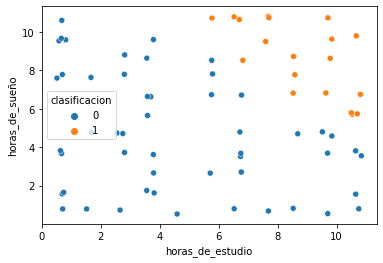

In [3]:
sns.scatterplot(data=data, x='horas_de_estudio', y='horas_de_sueño', hue='clasificacion')

In [4]:
Y_reshape = data['clasificacion'].to_numpy().reshape(-1,1)
# Y_reshape

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns='clasificacion'), Y_reshape)
print ("x_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(Y_train.shape))
print ("x_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(Y_test.shape))

x_train shape: (53, 2)
y_train shape: (53, 1)
x_test shape: (18, 2)
y_test shape: (18, 1)


In [6]:
num_features = X_train.shape[1]

learning_rate = 0.01
training_epochs = 2000

In [7]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, num_features], name="X")
Y = tf.placeholder(tf.float32, [None, 1], name="Y")

In [10]:
W = tf.get_variable("W", [num_features, 1], initializer = tf.keras.initializers.glorot_normal())
b = tf.get_variable("b", [1], initializer = tf.zeros_initializer())

Z = tf.add(tf.matmul(X, W), b)
prediction = tf.nn.sigmoid(Z)

In [12]:
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = Z, labels = Y))

In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [14]:
init = tf.global_variables_initializer()
cost_history = np.empty(shape=[1],dtype=float)

--------------------------------------------
Train Accuracy: 1.0
Test Accuracy: 0.9444444
--------------------------------------------
   Predicciones    
--------------------------------------------
[8.1, 9.3]  -->  [0.8452479]  -->  [1.]
[7.0, 7.1]  -->  [0.27304214]  -->  [0.]
[3.6, 2.9]  -->  [0.00087354]  -->  [0.]
[9.9, 9.6]  -->  [0.96343005]  -->  [1.]
--------------------------------------------


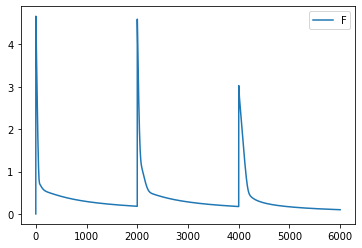

In [18]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        _, c = sess.run([optimizer, cost], feed_dict={X: X_train, Y: Y_train})
        # print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
        cost_history = np.append(cost_history, c)
        
        
    # Calculate the correct predictions
    correct_prediction = tf.to_float(tf.greater(prediction, 0.5))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.to_float(tf.equal(Y, correct_prediction)))

    print("--------------------------------------------")
    print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
    print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))

    #predicciones
    valores_nuevos = {X: [[8.1,9.3],[7.0,7.1],[3.6,2.9],[9.9,9.6]]}
    clasificacion = sess.run(prediction, feed_dict = valores_nuevos )
    label_clasificacion = sess.run( tf.to_float(tf.greater(clasificacion, 0.5)))

    print("--------------------------------------------")
    print("   Predicciones    ")
    print("--------------------------------------------")
    for val in range(4):
        print( valores_nuevos[X][val] , " --> " , clasificacion[val] , " --> " , label_clasificacion[val])
    print("--------------------------------------------")

    # pintamos funcion de coste
    plt.plot( cost_history )
    plt.legend("Función de coste")
    plt.show()
